In [2]:
# Open the EPA files for 2015 - 'oz' (Ozone data), 'sun'(solar radiation data), 
# 'wind' (Wind speed),  'temp' (temperature), 'voc' (volital organic compounds), 
# nox (nitrous oxides)

import pandas as pd
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
oz = pd.read_csv("daily_44201_2015.csv")
sun = pd.read_csv('PB_63301_2015_Radiation.csv')
wind = pd.read_csv('daily_WIND_2015.csv')
temp = pd.read_csv('daily_TEMP_2015.csv')
voc = pd.read_csv('daily_VOCS_2015.csv')
nox = pd.read_csv('daily_42602_2015.csv')

In [3]:
#  an example of the columns from each of the variables.  They are all in essentially the
# same format.  Some use '1st Max Value' and others spell it 'First Max Value".

nox.columns

Index([u'State Code', u'County Code', u'Site Num', u'Parameter Code', u'POC',
       u'Latitude', u'Longitude', u'Datum', u'Parameter Name',
       u'Sample Duration', u'Pollutant Standard', u'Date Local',
       u'Units of Measure', u'Event Type', u'Observation Count',
       u'Observation Percent', u'Arithmetic Mean', u'1st Max Value',
       u'1st Max Hour', u'AQI', u'Method Code', u'Method Name',
       u'Local Site Name', u'Address', u'State Name', u'County Name',
       u'City Name', u'CBSA Name', u'Date of Last Change'],
      dtype='object')

Print out a header for each of the variables.  

In [4]:
#  the input variable that provides information about the amount of solar radiation 
# at specific location for a specific day.  

sun[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', 'First Maximum Value',
       'First Maximum Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,First Maximum Value,First Maximum Hour,CBSA Name
0,Solar radiation,2015-01-01,Langleys/minute,0.090833,0.44,11.0,"Birmingham-Hoover, AL"
1,Solar radiation,2015-01-02,Langleys/minute,0.030417,0.15,11.0,"Birmingham-Hoover, AL"


In [5]:
#  Ozone, the target variable, note that the CBSA (location) is different from the
# the other variables.   The date and location for all of the variables will
# need to be carefully coordinated. 

oz[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,1st Max Value,1st Max Hour,CBSA Name
0,Ozone,2015-03-01,Parts per million,0.021167,0.027,0,"Daphne-Fairhope-Foley, AL"
1,Ozone,2015-03-02,Parts per million,0.018167,0.024,10,"Daphne-Fairhope-Foley, AL"


In [6]:
#   The wind aspect for date and location measured in knots

wind[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,1st Max Value,1st Max Hour,CBSA Name
0,Wind Speed - Resultant,2015-01-01,Knots,0.704167,1.3,15,"Birmingham-Hoover, AL"
1,Wind Speed - Resultant,2015-01-02,Knots,1.250000,2.1,19,"Birmingham-Hoover, AL"


In [7]:
#  The input data for volital organic compounds.   There are many different VOCS - they will
# have to be summed for each day and location.

voc[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,1st Max Value,1st Max Hour,CBSA Name
0,Carbon disulfide,2015-01-06,Parts per billion Carbon,0.01,0.01,0,"Phoenix-Mesa-Scottsdale, AZ"
1,Carbon disulfide,2015-01-18,Parts per billion Carbon,0.01,0.01,0,"Phoenix-Mesa-Scottsdale, AZ"


In [8]:
#   The imput data for nitrous dioxide, frequently referred to as 'NOX' measured in ppb.  

nox[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,1st Max Value,1st Max Hour,CBSA Name
0,Nitrogen dioxide (NO2),2015-01-01,Parts per billion,13.916667,22.9,21,"Birmingham-Hoover, AL"
1,Nitrogen dioxide (NO2),2015-01-02,Parts per billion,14.983333,22.7,7,"Birmingham-Hoover, AL"


In [9]:
#   The imput data for temperature, measured in Fahrenheit.  

temp[['Parameter Name','Date Local','Units of Measure','Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'CBSA Name']].head(2)

,Parameter Name,Date Local,Units of Measure,Arithmetic Mean,1st Max Value,1st Max Hour,CBSA Name
0,Outdoor Temperature,2015-01-01,Degrees Fahrenheit,43.083333,52.7,12,"Birmingham-Hoover, AL"
1,Outdoor Temperature,2015-01-02,Degrees Fahrenheit,46.841667,52.2,23,"Birmingham-Hoover, AL"


In [10]:
print "Temperature rows and columns ('temp')", temp.shape
print "NOX rows and columns ('nox')",nox.shape
print "VOC rows and columns ('voc')",voc.shape
print "Wind rows and columns ('wind')",wind.shape
print "Solar Radiation rows and columns ('sun')",sun.shape
print "Ozone rows and columns ('oz')",oz.shape

Temperature rows and columns ('temp') (284588, 29)
NOX rows and columns ('nox') (155673, 29)
VOC rows and columns ('voc') (876523, 29)
Wind rows and columns ('wind') (466397, 29)
Solar Radiation rows and columns ('sun') (92736, 28)
Ozone rows and columns ('oz') (391810, 29)


# EDA  
#### It clear from the previous cell that there are a lot of differences in the data sets.  
#### The goal is to pick a couple of locations where the all data exists in order to build
#### a model that can be indicative of Ozone.  

#### I will make a special note of the size of the VOC data set.  The reason for this is because there
#### there are many different types of VOCs.   They will have to be combined for a location and date.

#### I few preliminary plots of ozone.  

<function matplotlib.pyplot.show>

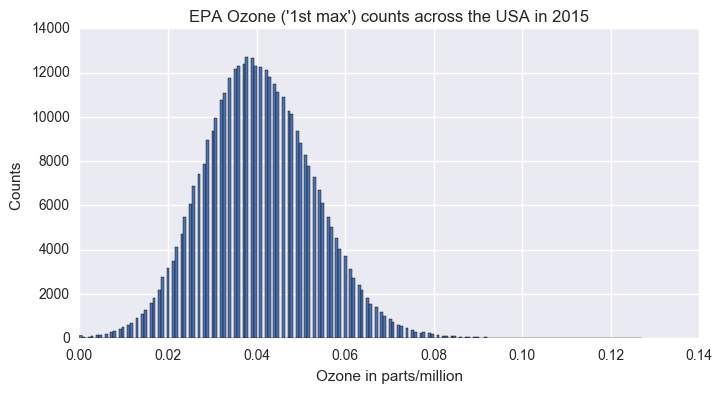

In [202]:
# plot of maximum ozone counts for 2015 for the entire EPA data set.  

plt.hist(oz['1st Max Value'], bins = 200)
plt.xlabel("Ozone in parts/million")
plt.title("EPA Ozone ('1st max') counts across the USA in 2015")
plt.ylabel("Counts ")
plt.savefig('EPA Ozone -"1st max"- counts across the USA.jpg')
plt.show

The previous plot illustrates that the '1st max' ozone count distribution follows a very slightly skewed Gaussian ('Normal') distribution.  Let's look at the NOX levels across country.

<function matplotlib.pyplot.show>

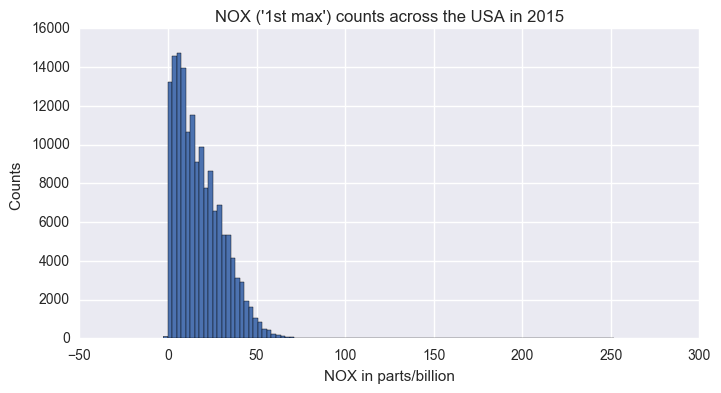

In [12]:
# plot of maximum NOX counts for 2015 for the entire EPA data set (all of the USA)

plt.hist(nox['1st Max Value'], bins = 100)
plt.xlabel("NOX in parts/billion")
plt.title("NOX ('1st max') counts across the USA in 2015")
plt.ylabel("Counts ")
plt.show

The previous plot illustrates that the '1st max' NOX count distribution looks like half of Gaussian ('Normal') distribution. 

In [13]:
# Let's look at the list of VOCs that will need to be summed.  The list is extensive.
# This explains the number of rows we observed in the 'shape of the data set.  
# Later, they will be summed up for each day.  First we will focus in on one location
# and the variables we are going to work with.  This will make the dataframes 
# easier to visualize.  

voc['Parameter Name'].unique()

array(['Carbon disulfide', 'Propylene', 'Acetylene', 'Freon 114',
       '1,3-Butadiene', 'n-Octane', 'Methyl tert-butyl ether',
       'Tert-amyl methyl ether', 'tert-Butyl ethyl ether',
       'Ethyl acrylate', 'Methyl methacrylate', 'Acrolein - Unverified',
       'Methyl isobutyl ketone', 'Acetonitrile', 'Acrylonitrile',
       'Chloromethane', 'Dichloromethane', 'Chloroform',
       'Carbon tetrachloride', 'Bromoform', 'Trichlorofluoromethane',
       'Chloroethane', '1,1-Dichloroethane', 'Methyl chloroform',
       'Ethylene dichloride', 'Tetrachloroethylene',
       '1,1,2,2-Tetrachloroethane', 'Bromomethane',
       '1,1,2-Trichloroethane', '1,1,2-Trichloro-1,2,2-trifluoroethane',
       'Dichlorodifluoromethane', 'Trichloroethylene',
       '1,1-Dichloroethylene', 'Bromodichloromethane',
       '1,2-Dichloropropane', 'trans-1,3-Dichloropropene',
       'cis-1,3-Dichloropropene', 'Dibromochloromethane', 'Chloroprene',
       'Bromochloromethane', 'trans-1,2-Dichloroethylene',
 

### Let's focus in on the Houston TX area which, due to the large number refineries, 
### has a history of high levels of Ozone (O3).   Channelview TX is a suburb of Houston.  

In [14]:
# Use a boolean list to filter the data frames 

Channelview_oz = oz[oz['City Name'] == 'Channelview']
Channelview_oz.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
335312,48,201,26,44201,3,29.802707,-95.125495,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,14,NaN,-,Channelview,1405 Sheldon Road,Texas,Harris,Channelview,"Houston-The Woodlands-Sugar Land, TX",2016-07-31
335313,48,201,26,44201,3,29.802707,-95.125495,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,10,NaN,-,Channelview,1405 Sheldon Road,Texas,Harris,Channelview,"Houston-The Woodlands-Sugar Land, TX",2016-07-31


In [15]:
# Check to see if Channelview has more than one site by looking at the Latitude.  If there
# is more than one Latitude value, there is more than one site there.  Since there is only one
#  value of Latitude, it is the only site.  

Channelview_oz['Latitude'].unique()

array([ 29.802707])

# Data refining...   Ozone first.
We have to filter this data for each input starting with the target, ozone for Channelview TX.

In [16]:
# How many '1st Max' ozone counts are there?   
Channelview_oz['1st Max Value'].value_counts().sum()

369

In [17]:
# There are 369? Ideally we would want 365 (days of the year) 
# Let's see if there are some duplicates

Channelview_oz_max = oz[oz['City Name'] == 'Channelview'][['Date Local','1st Max Value']]
Channelview_oz_max.shape

(369, 2)

In [18]:
# There are 3 duplicates.   
Channelview_oz_max.duplicated().sum()

3

In [19]:
# Where are the duplicate rows?  There is a triplicate rows and a duplicate rows.  Eliminate them.

Channelview_oz_max.loc[Channelview_oz_max.duplicated(keep=False),:]

,Date Local,1st Max Value
335550,2015-08-27,0.056
335551,2015-08-27,0.056
335552,2015-08-27,0.056
335553,2015-08-28,0.073
335554,2015-08-28,0.073


In [20]:
# This code eliminates the dups.  (keeping the first one)    Now we are down to 366...
#  2015 is not a leap year so we still have one type of duplicate to address.

Channelview_oz_max.drop_duplicates(keep='first',inplace = True)
Channelview_oz_max.shape

(366, 2)

In [21]:
# The duplicate is in in the "Date Local" column.  

Channelview_oz_max['Date Local'].duplicated().sum()

1

In [22]:
# Reset the index to make the dataframe easier to work with.  

Channelview_oz_max.reset_index(drop=True,inplace=True)

In [23]:
#  Look at the duplicate.

Channelview_oz_max.loc[Channelview_oz_max['Date Local'].duplicated(keep=False),:]

,Date Local,1st Max Value
239,2015-08-28,0.073
240,2015-08-28,0.035


In [24]:
# drop the second one and now we have 365 days of ozone data for Channelview, TX.

Channelview_oz_max.drop(Channelview_oz_max.index[240],inplace=True)
Channelview_oz_max.shape

(365, 2)

In [25]:
# rename the columns so that they are easier to work with when we merge the dataframe with
# other dataframes for the other variables.  

Channelview_oz_max.columns=[['date_local','oz_max']]
Channelview_oz_max.head(2)

,date_local,oz_max
0,2015-01-01,0.015
1,2015-01-02,0.011


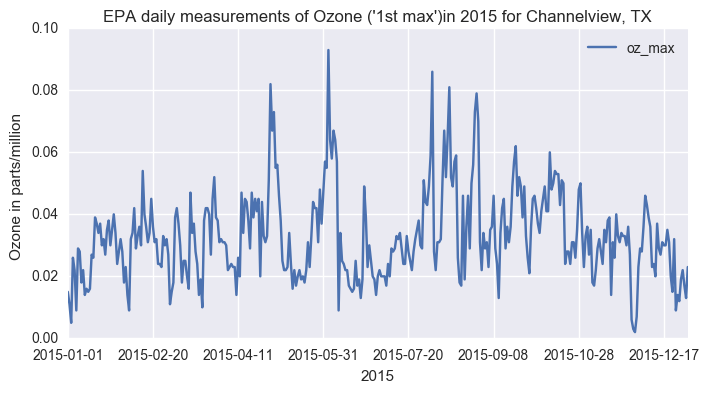

In [219]:
# Plot the ozone data for Channelview TX for the year 2015

#Channelview_oz_max['oz_max'].plot()
Channelview_oz_max.groupby('date_local').sum().plot()
plt.xlabel("2015")
plt.title("EPA daily measurements of Ozone ('1st max')in 2015 for Channelview, TX")
#plt.savefig('EPA Ozone -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("Ozone in parts/million ")

# Ozone - is ready...   VOCs are next 
We now have the ozone data for ChannelView TX ready for merging with the other input variables. 

In [27]:
# Filter the voc file down to Channelview TX and pull out the date column and 1st max column.
# Remember that there are many differnt VOCs so we have to compbine them for each day.  

Channelview_voc = voc[voc['City Name'] == 'Channelview'][['Date Local','1st Max Value','Parameter Name']]
Channelview_voc.columns=['date_local','voc_max','voc_type']
Channelview_voc.head(5)

,date_local,voc_max,voc_type
696997,2015-01-07,89.4,Sum of PAMS target compounds
696998,2015-01-08,355.1,Sum of PAMS target compounds
696999,2015-01-09,254.8,Sum of PAMS target compounds
697000,2015-01-10,129.6,Sum of PAMS target compounds
697001,2015-01-11,192.3,Sum of PAMS target compounds


In [28]:
#  Let us see if there are any duplicated rows. Before we combine them.   Zero dups.. great.

Channelview_voc.duplicated().sum()

0

In [29]:
Channelview_voc.loc[Channelview_voc.voc_max > 3500,:]

,date_local,voc_max,voc_type
697308,2015-11-23,4378.00,Sum of PAMS target compounds
697658,2015-11-23,5424.25,Total NMOC (non-methane organic compound)


In [30]:
# We don't need the voc_type column now.  

Channelview_voc_max=Channelview_voc[['date_local','voc_max']]
Channelview_voc_max.head(2)

,date_local,voc_max
696997,2015-01-07,89.4
696998,2015-01-08,355.1


In [31]:
# We will group by day and sum the vocs for each day...

Channelview_voc_max.groupby('date_local').sum().head()

,voc_max
date_local,
2015-01-01,140.42
2015-01-02,320.06
2015-01-03,285.63
2015-01-04,275.19
2015-01-05,720.87


In [32]:
#  Assign this dataframe a name...

Total_voc_Channelview = Channelview_voc_max.groupby('date_local').sum()
Total_voc_Channelview.head(2)

,voc_max
date_local,
2015-01-01,140.42
2015-01-02,320.06


In [33]:
#  However, we want the date as a column so we can merge it with other data frames with
# the same date.   

Total_voc_Channelview['date_local'] = Total_voc_Channelview.index
Total_voc_Channelview.head(2)

,voc_max,date_local
date_local,,
2015-01-01,140.42,2015-01-01
2015-01-02,320.06,2015-01-02


In [34]:
# See how many days we have data for...   358 out of 365.. not bad.  

Total_voc_Channelview.shape

(358, 2)

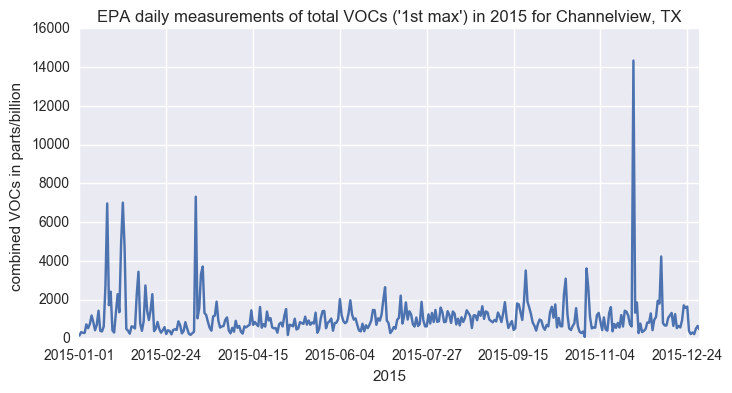

In [215]:
# Let's see a plot of the vocs for the year for Channelview TX

Total_voc_Channelview['voc_max'].plot()
plt.xlabel("2015")
plt.title("EPA daily measurements of total VOCs ('1st max') in 2015 for Channelview, TX")
plt.savefig('EPA VOC Total -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("combined VOCs in parts/billion ")

# VOC - is ready...   Solar radiation is next 
We now have the ozone and VOC data for ChannelView TX ready for merging with the other input variables.   Solar 

In [36]:
#  Solar radiation for Channelview TX.

Channelview_sun = sun[sun['City Name'] == 'Channelview'][['Date Local','First Maximum Value']]
Channelview_sun.columns=['date_local','sun_max']
Channelview_sun.head(2)

,date_local,sun_max
59490,2015-01-01,0.15
59491,2015-01-02,0.32


In [37]:
# See its shape....   Nice!   365 days on the nose...

Channelview_sun.shape

(365, 2)

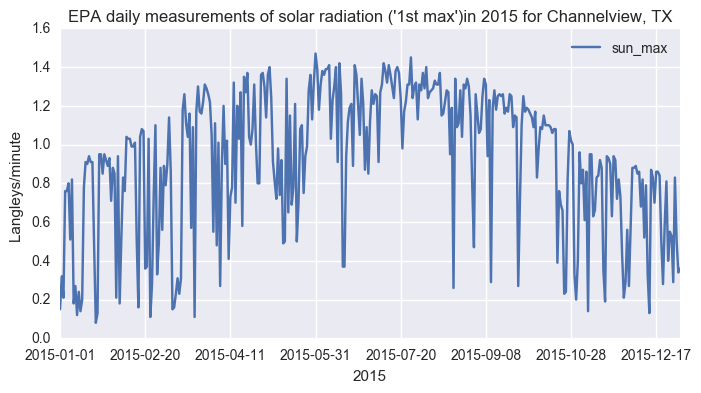

In [214]:
# Plot it for the 2015 year....

#Channelview_sun['sun_max'].plot()
Channelview_sun.groupby('date_local').sum().plot()
plt.xlabel("2015")
plt.title("EPA daily measurements of solar radiation ('1st max')in 2015 for Channelview, TX")
plt.savefig('EPA VOC Total -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("Langleys/minute ")

# Solar radiation - is ready...   Temperature is next 
We now have the ozone and VOC and Solar Radiation data for ChannelView TX ready for merging with the other input variables.    

In [39]:
#  Temperature for Channelview TX for 2015

Channelview_temp = temp[temp['City Name'] == 'Channelview'][['Date Local','1st Max Value']]
Channelview_temp.columns=['date_local','temp_max']
Channelview_temp.head(2)

,date_local,temp_max
205363,2015-01-01,46.0
205364,2015-01-02,56.0


In [40]:
# check the shape.... 365 days... nice.

Channelview_temp.shape

(365, 2)

In [41]:
len(Channelview_sun['sun_max'])


365

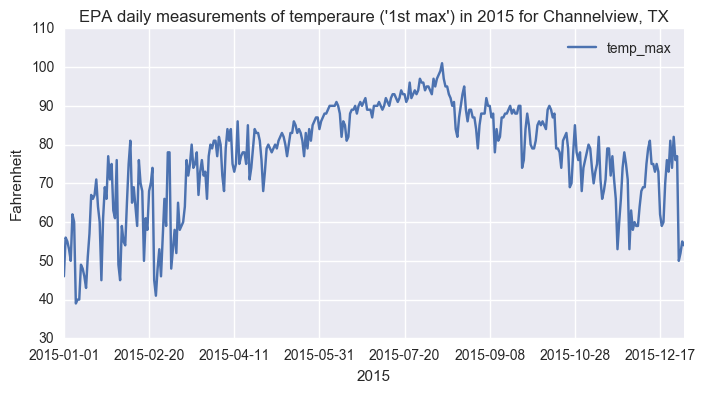

In [213]:
# Plot it out for the year...

#Channelview_temp['temp_max'].plot()
Channelview_temp.groupby('date_local').sum().plot()
plt.xlabel("2015")
plt.title("EPA daily measurements of temperaure ('1st max') in 2015 for Channelview, TX")
plt.savefig('EPA temperature -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("Fahrenheit")

# Temperature - is ready...   Wind is next 
We now have the ozone and VOC and Solar Radiation data for ChannelView TX ready for merging with the other input variables.  

In [43]:
#  bring in the wind data

Channelview_wind = wind[wind['City Name'] == 'Channelview'][['Date Local','1st Max Value']]
Channelview_wind.columns=['date_local','wind_max']
Channelview_wind.shape

(730, 2)

In [44]:
#   What is with the 730?  It turns out that the data we want is the first 365 days .
#  The second 365 rows are related to the direction of the wind.  

Cview_wind=Channelview_wind[['date_local','wind_max']].head(365)
Cview_wind.shape

(365, 2)

In [45]:
Cview_wind.head(2)

,date_local,wind_max
387115,2015-01-01,8.4
387116,2015-01-02,6.4


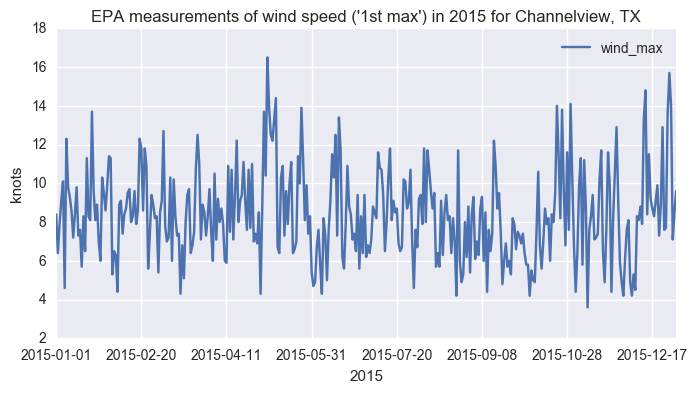

In [212]:
# Let's make sure it is the data we want.... Plot it...

#Cview_wind['wind_max'].plot()
Cview_wind.groupby('date_local').sum().plot()
plt.xlabel("2015")
plt.title("EPA measurements of wind speed ('1st max') in 2015 for Channelview, TX")
plt.savefig('EPA wind -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("knots")

# NOX is next
We now have the ozone and VOC and Solar Radiation data for ChannelView TX ready for merging with the other input variables.

In [47]:
# Bring in the NOX values..

Channelview_nox = nox[nox['City Name'] == 'Channelview'][['Date Local','1st Max Value']]
Channelview_nox.columns=['date_local','nox_max']

In [48]:
Channelview_nox.shape

(361, 2)

In [49]:
Channelview_nox.duplicated().sum()

0

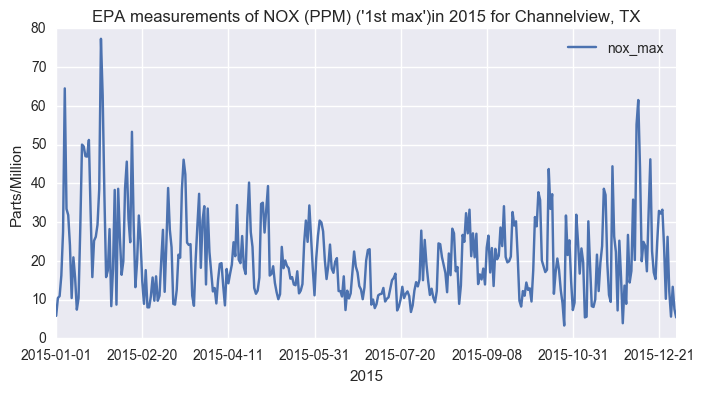

In [211]:
#Cview_wind_nox['nox_max'].plot()
Channelview_nox.groupby('date_local').sum().plot()
plt.xlabel("2015")
plt.title("EPA measurements of NOX (PPM) ('1st max')in 2015 for Channelview, TX")
plt.savefig('EPA NOX -"1st max"- 2015 Channelview TX.jpg')
plt.ylabel("Parts/Million")

# Merge the data into one dataframe and create X and y.


In [51]:
# merge voc with nox for Channelview TX

x_y = Channelview_nox.merge(Total_voc_Channelview, on='date_local', how='left')
x_y.head()

,date_local,nox_max,voc_max
0,2015-01-01,5.8,140.42
1,2015-01-02,10.4,320.06
2,2015-01-03,10.9,285.63
3,2015-01-04,16.2,275.19
4,2015-01-05,27.5,720.87


In [52]:
x_y.shape

(361, 3)

In [53]:
# see how many nulls there are.  Drop those rows.

x_y.isnull().sum()

date_local    0
nox_max       0
voc_max       7
dtype: int64

In [54]:
x_y = x_y.dropna(axis=0)
x_y.isnull().sum()

date_local    0
nox_max       0
voc_max       0
dtype: int64

In [55]:
#  we have data for 354 days from 2015.  

x_y.shape

(354, 3)

In [56]:
x_y= x_y.merge(Channelview_temp, on='date_local', how='left')
x_y.head(2)

,date_local,nox_max,voc_max,temp_max
0,2015-01-01,5.8,140.42,46.0
1,2015-01-02,10.4,320.06,56.0


In [57]:
x_y.shape

(354, 4)

In [58]:
x_y= x_y.merge(Channelview_sun, on='date_local', how='left')
x_y.head(2)

,date_local,nox_max,voc_max,temp_max,sun_max
0,2015-01-01,5.8,140.42,46.0,0.15
1,2015-01-02,10.4,320.06,56.0,0.32


In [59]:
x_y.shape

(354, 5)

In [60]:
x_y= x_y.merge(Cview_wind, on='date_local', how='left')
x_y.head(2)

,date_local,nox_max,voc_max,temp_max,sun_max,wind_max
0,2015-01-01,5.8,140.42,46.0,0.15,8.4
1,2015-01-02,10.4,320.06,56.0,0.32,6.4


In [61]:
x_y.shape

(354, 6)

In [62]:
# Last, bring in the ozone data 

x_y= x_y.merge(Channelview_oz_max, on='date_local', how='left')
x_y.head(2)

,date_local,nox_max,voc_max,temp_max,sun_max,wind_max,oz_max
0,2015-01-01,5.8,140.42,46.0,0.15,8.4,0.015
1,2015-01-02,10.4,320.06,56.0,0.32,6.4,0.011


In [68]:
# set the threshold for classification of the target variable.  

class_list=[]
for i in x_y['oz_max']:
    if i >= 0.06:
        class_list.append(1.0)
    else: 
        class_list.append(0.0)

len(class_list)

y = pd.Series(class_list)
x_y['target']= y
x_y.head()

,date_local,nox_max,voc_max,temp_max,sun_max,wind_max,oz_max,target
0,2015-01-01,5.8,140.42,46.0,0.15,8.4,0.015,0.0
1,2015-01-02,10.4,320.06,56.0,0.32,6.4,0.011,0.0
2,2015-01-03,10.9,285.63,55.0,0.21,7.9,0.005,0.0
3,2015-01-04,16.2,275.19,53.0,0.76,9.1,0.026,0.0
4,2015-01-05,27.5,720.87,50.0,0.76,10.1,0.022,0.0


In [69]:
x_y.shape

(354, 8)

In [165]:
# create X and y for the modeling.  

X=x_y[['voc_max','nox_max','temp_max','sun_max','wind_max']]
y=x_y['target']

In [71]:
X.shape

(354, 5)

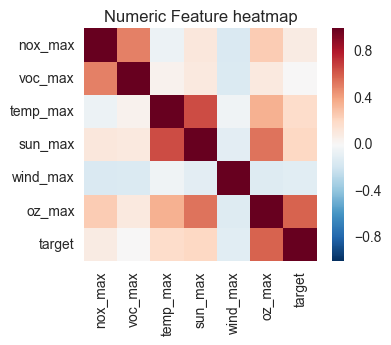

In [72]:
#  heatmap to see how much correlation there is between the variables.

fig,ax = plt.subplots(figsize=(4,3))
correlation = x_y.select_dtypes(include=['float64','int64']).iloc[:,:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

In [127]:
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc

In [479]:
#  function to evaluate models.  This function takes in the type of model and fits it with
# X-train and y_train  and then uses X_test to make predictions (y_pred) based on the 
# model.   Output from the function - Confusion Matrix, ROC-AUC plot, classification report
#  the importances of the input features.   It returns the accuracy score and the area under 
# the curve which is collected by the program for a comparison purposes.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

def evaluate_model(model):
    instance=model
    instance.fit(X_train,y_train)
    y_pred= instance.predict(X_test)
    
    
    confusion = confusion_matrix(y_test, y_pred)
    confusiontable = pd.DataFrame(confusion, index=['Below Threshold', 'Above Threshold'],
                        columns=['predicted Below','predicted Above'])
    print "Confusion Matrix"
    print confusiontable    
    print ''
    Accuracy_Score = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print "Accuracy Score =", Accuracy_Score
    print ""
    print "Classification report"
    print classification_report(y_test,y_pred)
    print ''
     
    print "ROC-AUC curve"


    
#    use decision_function (X_test) or predict_proba(X_test) to get y_score for 
#   ROC-AUC curves

#    y_score = model.decision_function(X_test)
    y_score = model.predict_proba(X_test)[:,1]
    
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

#  Find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
    ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve  
    plt.figure(figsize=[6,4])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('Receiver operating characteristic for Ozone detection', fontsize=10)
    plt.legend(loc="lower right")
    plt.show()
    

#    Print out the features and their importances.  
    print ""
    print "Feature importances"
    print '     VOC','    ','   NOX','     ',' Temp','    ',' Solar','    ','Wind Speed'
    print instance.feature_importances_

        
#   Return the accuracy score and the area under the curve for comparing different 
#   models.

    return Accuracy_Score,ROC_AUC[1] #confusion_matrix(y_test, y_pred)

 

In [ ]:
   y_score = model.decision_function(X_test)

    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

# For class 1, find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
    ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has ozone)
    plt.figure(figsize=[11,9])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for Ozone detection', fontsize=10)
    plt.legend(loc="lower right")
    plt.show()

In [433]:
MODEL={}   #  MODEL  is a dictionary for accuracy scores for each model.
AC_Dict={}  # AC_Dict is a dictionary for area under the curve in ROC-AUC plot 

# KNN Classifier

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               97                1
Above Threshold                9                0

Accuracy Score = 0.906542056075

Classification report
             precision    recall  f1-score   support

        0.0       0.92      0.99      0.95        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.91      0.87       107


ROC-AUC curve


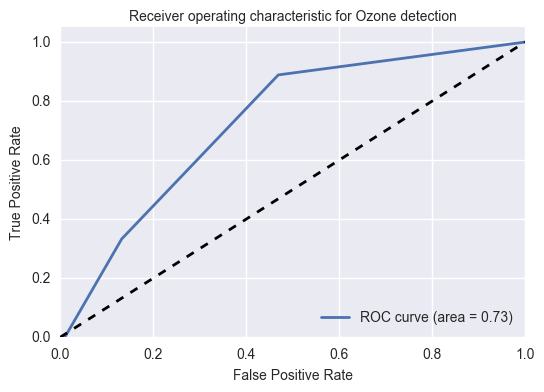

VOC NOX Temp Solar Wind Speed


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [469]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 5)
evaluate_model(knn)


In [437]:
#  Set up the grid search for KNN

class_model= KNeighborsClassifier()
#Parameter dictionary of settings options for the model we're passing to grid search.
param_grid = {  'n_neighbors' : [2,5,8,10,13,15,20,23,27,32]}

knngrid = GridSearchCV(class_model, param_grid, cv=KFold(len(y), n_folds=3, shuffle=True))


In [438]:
#Fit the grid search to X, and y.
knngrid.fit(X, y)

#.
print knngrid.best_score_
print knngrid.best_params_
print knngrid.best_estimator_

0.878531073446
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                9                0

Accuracy Score = 0.915887850467

Classification report
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.92      0.88       107


ROC-AUC curve


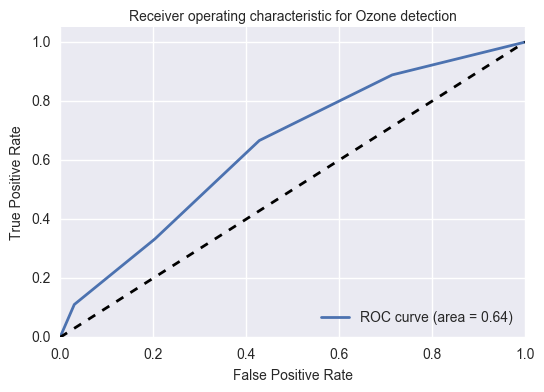

In [439]:
AS_KNN = evaluate_model(knngrid.best_estimator_)
MODEL['KNN']= AS_KNN[0]
AC_Dict['KNN']=AS_KNN[1]

In [440]:
print AS_KNN[0]
print AS_KNN[1]

0.915887850467
0.644557823129


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               95                3
Above Threshold                9                0

Accuracy Score = 0.88785046729

Classification report
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.89      0.86       107


ROC-AUC curve


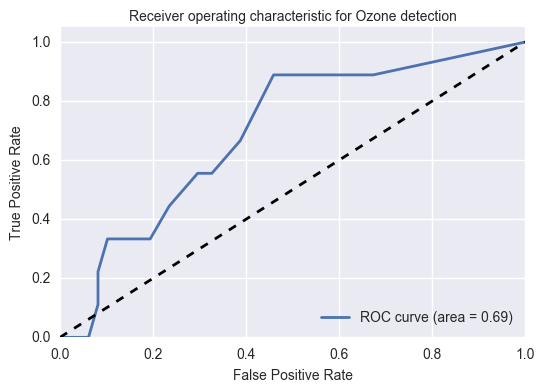

In [392]:
# Bag KNN

from sklearn.ensemble import BaggingClassifier
bknn = BaggingClassifier(KNeighborsClassifier())

evaluate_model(bknn)

In [441]:
#  Set up the grid search for KNN

class_model= KNeighborsClassifier()
#Parameter dictionary of settings options for the model we're passing to grid search.
param_grid = {  'n_neighbors' : [2,5,8,10,13,15,20,23,27,32]}

knngrid = GridSearchCV(class_model, param_grid, cv=KFold(len(y), n_folds=3, shuffle=True))


In [442]:
#Fit the grid search to X, and y.
knngrid.fit(X, y)

#.
print knngrid.best_score_
print knngrid.best_params_
print knngrid.best_estimator_

0.878531073446
{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                9                0

Accuracy Score = 0.915887850467

Classification report
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.92      0.88       107


ROC-AUC curve


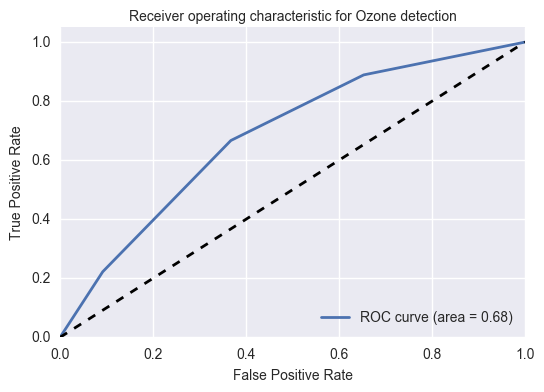

0.91588785046728971

In [426]:
evaluate_model(knngrid.best_estimator_)

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                9                0

Accuracy Score = 0.897196261682

Classification report
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.95        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.90      0.87       107


ROC-AUC curve


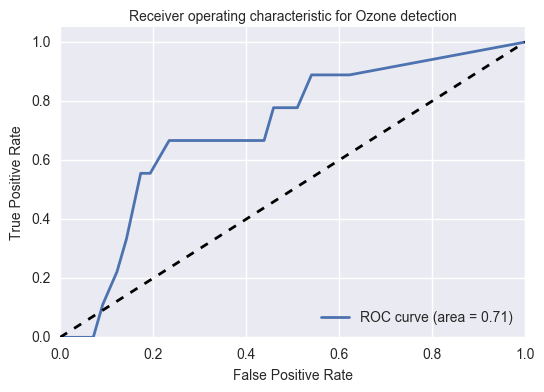

In [445]:
# Bag KNN

from sklearn.ensemble import BaggingClassifier
bknn = BaggingClassifier(KNeighborsClassifier())

AS_KNNB = evaluate_model(bknn)
MODEL['KNN-BAG']= AS_KNNB[0]
AC_Dict['KNN-BAG']=AS_KNNB[1]

# Logistic Regression

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               97                1
Above Threshold                6                3

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97        98
        1.0       0.75      0.33      0.46         9

avg / total       0.93      0.93      0.92       107


ROC-AUC curve


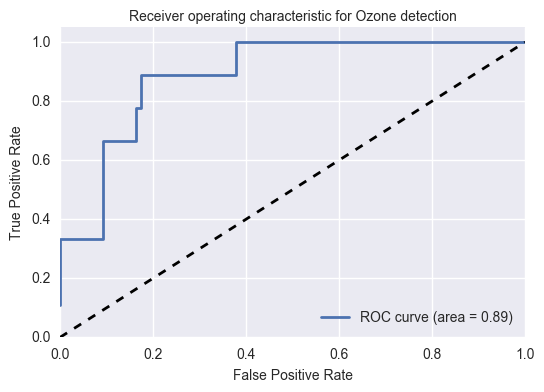


Feature importances
     VOC         NOX        Temp       Solar      Wind Speed


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [480]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
evaluate_model(logr)

In [414]:
# Set up the grid search of Logistic Regressor

logr_params = {'C':[0.001, 0.01, 0.1, 5.0, 10.0, 50], 'penalty': ['l1','l2']}

gs_logr = GridSearchCV(logr,logr_params, n_jobs=-1,cv=KFold(len(y), n_folds=3, shuffle=True))

In [429]:
gs_logr.fit(X,y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=354, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 5.0, 10.0, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [430]:
print gs_logr.best_params_
print gs_logr.best_score_

{'penalty': 'l1', 'C': 10.0}
0.889830508475


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                3                6

Accuracy Score = 0.953271028037

Classification report
             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97        98
        1.0       0.75      0.67      0.71         9

avg / total       0.95      0.95      0.95       107


ROC-AUC curve


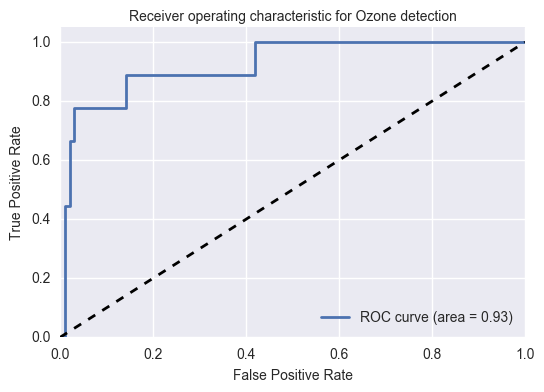

In [447]:
AS_LR = evaluate_model(gs_logr.best_estimator_)
MODEL['LOGISTIC REGR']= AS_LR[0]
AC_Dict['LOGISTIC REGR']= AS_LR[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               97                1
Above Threshold                4                5

Accuracy Score = 0.953271028037

Classification report
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97        98
        1.0       0.83      0.56      0.67         9

avg / total       0.95      0.95      0.95       107


ROC-AUC curve


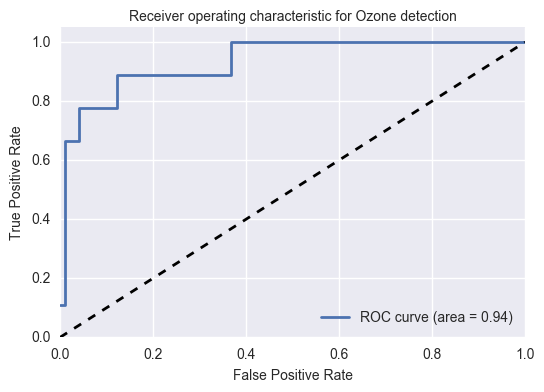

In [432]:
#now bag logistic regression

blogr = BaggingClassifier(gs_logr.best_estimator_)

AS_LB = evaluate_model(blogr)
MODEL['LOGISTIC-BAG']= AS_LB[0]
AC_Dict['LOGISTIC-BAG']= AS_LB[1]

# Decision Trees Classifier

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               91                7
Above Threshold                4                5

Accuracy Score = 0.897196261682

Classification report
             precision    recall  f1-score   support

        0.0       0.96      0.93      0.94        98
        1.0       0.42      0.56      0.48         9

avg / total       0.91      0.90      0.90       107


ROC-AUC curve


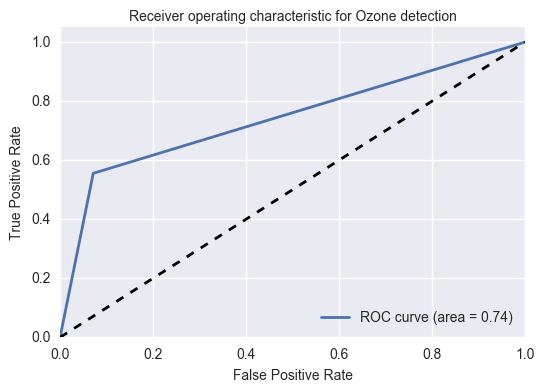


Feature importances
     VOC         NOX        Temp       Solar      Wind Speed
[ 0.04547547  0.31189515  0.18843495  0.32052369  0.13367074]


(0.89719626168224298, 0.74206349206349209)

In [481]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
evaluate_model(DT)

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               92                6
Above Threshold                4                5

Accuracy Score = 0.906542056075

Classification report
             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95        98
        1.0       0.45      0.56      0.50         9

avg / total       0.92      0.91      0.91       107


ROC-AUC curve


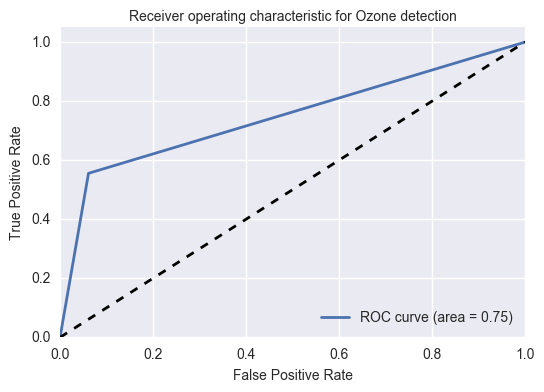

In [399]:
confusion = evaluate_model(DT)

In [363]:
confusiontable = pd.DataFrame(confusion, index=['Below Threshold', 'Above Threshold'],
                        columns=['predicted Below','predicted Above'])
confusiontable

,predicted Below,predicted Above
Below Threshold,90,8
Above Threshold,3,6


0.898305084746
{'max_features': 5, 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                9                0

Accuracy Score = 0.915887850467

Classification report
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.92      0.88       107


ROC-AUC curve


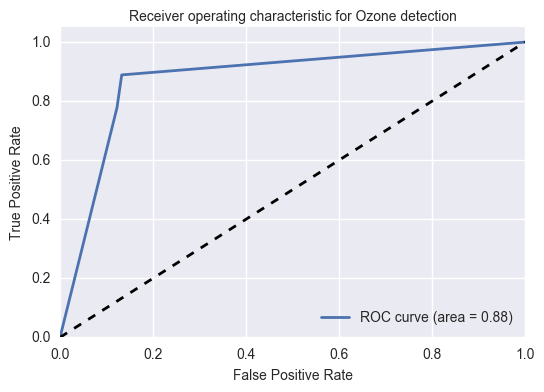

In [449]:
#Decision tree grid search

#Parameter dictionary of settings options for the model we're passing grid search.
param_grid = {
   'criterion': ['gini', 'entropy'],
   'max_depth' : [None, 1,2,3,4,5,6,7],
   'max_features' : [1,3,5],
   'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2, 3]}

#Instantiate grid search.

DTgrid = GridSearchCV(DT, param_grid, n_jobs=-1,cv=KFold(len(y), n_folds=3, shuffle=True))

#Fit the grid search to X, and y.
DTgrid.fit(X, y)

#Store the best parameters in a variable.
print DTgrid.best_score_
print DTgrid.best_params_

AS_DT = evaluate_model(DTgrid.best_estimator_)

MODEL['DecisionTree']= AS_DT[0]
AC_Dict['DecisionTree']= AS_DT[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                5                4

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96        98
        1.0       0.67      0.44      0.53         9

avg / total       0.93      0.93      0.93       107


ROC-AUC curve


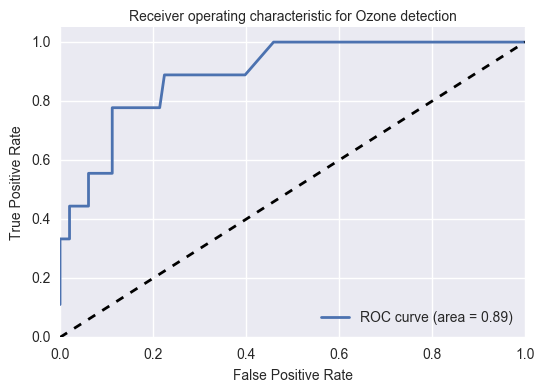

In [450]:
#now bag Decision Trees using the best estimator from the grid search

bDT = BaggingClassifier(DTgrid.best_estimator_)

AS_DecTree_Bag = evaluate_model(bDT)

MODEL['DecisionTree-BAG']= AS_DecTree_Bag[0]
AC_Dict['DecisionTree-BAG']= AS_DecTree_Bag[1]

# Support Vector Machine Classifier


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                9                0

Accuracy Score = 0.915887850467

Classification report
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        98
        1.0       0.00      0.00      0.00         9

avg / total       0.84      0.92      0.88       107


ROC-AUC curve


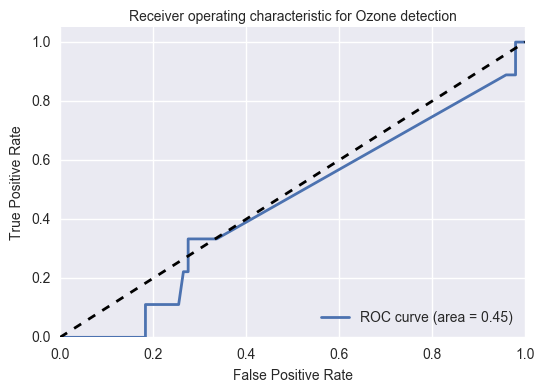

In [402]:
from sklearn.svm import SVC

svm = SVC(probability=True)

evaluate_model(svm)

In [367]:
# grid search SVM

svm_param_grid = {
   'C': [0.01,0.1,1.0,10.0,20,30],
   'gamma' : ['auto',0.1,1.0,10],
   'kernel' : ['rbf','linear']}

gssvm=GridSearchCV(svm, svm_param_grid, n_jobs=-1,cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X,y)

print gssvm.best_score_
print gssvm.best_params_
gssvm.best_estimator_

0.895480225989
{'kernel': 'linear', 'C': 10.0, 'gamma': 'auto'}


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.934579439252
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96        98
        1.0       0.62      0.56      0.59         9

avg / total       0.93      0.93      0.93       107

[[95  3]
 [ 4  5]]


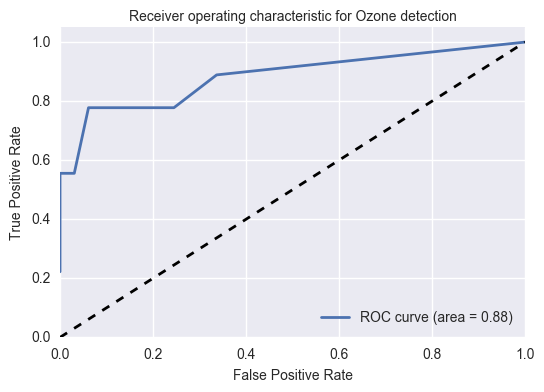

array([[95,  3],
       [ 4,  5]])

In [380]:
evaluate_model(gssvm.best_estimator_)


Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                5                4

Accuracy Score = 0.953271028037

Classification report
             precision    recall  f1-score   support

        0.0       0.95      1.00      0.98        98
        1.0       1.00      0.44      0.62         9

avg / total       0.96      0.95      0.94       107


ROC-AUC curve


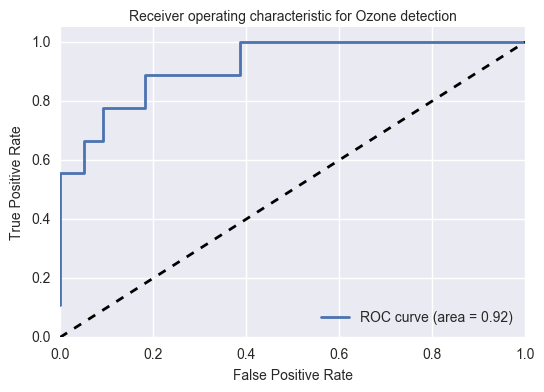

In [451]:
svm = SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM = evaluate_model(svm)

MODEL['SVM']= SVM[0]
AC_Dict['SVM']= SVM[1]

# Random Forest 

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                6                3

Accuracy Score = 0.92523364486

Classification report
             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96        98
        1.0       0.60      0.33      0.43         9

avg / total       0.91      0.93      0.92       107


ROC-AUC curve


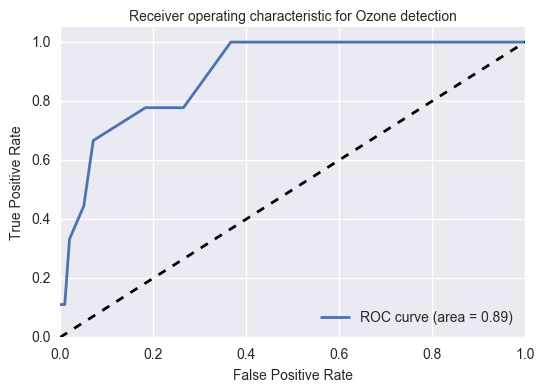

(0.92523364485981308, 0.89455782312925181)

In [452]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RF = RandomForestClassifier()
evaluate_model(RF)

In [405]:
#grid search 

RF_params = {
   'criterion': ['gini', 'entropy'],
   'max_depth' : [None, 1,2,4,7],
   'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 3],
   'class_weight':[None, 'balanced']}

gsRF = gssvm=GridSearchCV(RF, RF_params, n_jobs=-1,cv=KFold(len(y), n_folds=3, shuffle=True))

gsRF.fit(X,y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=354, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 4, 7], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 7, 'class_weight': None}
0.898305084746
Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               94                4
Above Threshold                3                6

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.97      0.96      0.96        98
        1.0       0.60      0.67      0.63         9

avg / total       0.94      0.93      0.94       107


ROC-AUC curve


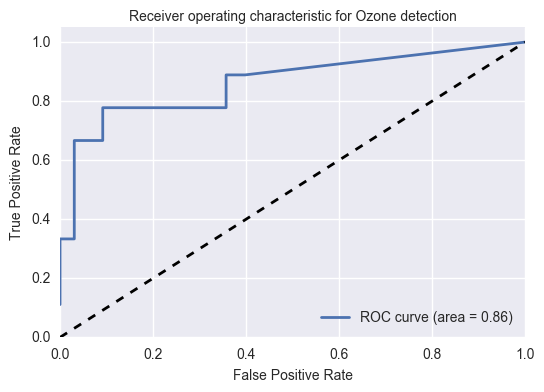

In [453]:
# Out put from grid search for Random Forest

print gsRF.best_params_
print gsRF.best_score_

RandomForest = evaluate_model(gsRF.best_estimator_)
MODEL['RandomForest'] = RandomForest

MODEL['RandomForest']= RandomForest[0]
AC_Dict['RandomForest']= RandomForest[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                7                2

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.97        98
        1.0       1.00      0.22      0.36         9

avg / total       0.94      0.93      0.91       107


ROC-AUC curve


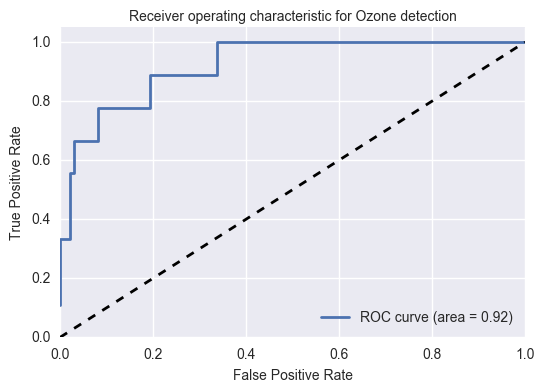

In [454]:
# now bag Random Forest using the best estimator from the grid search

baggsRF = BaggingClassifier(gsRF.best_estimator_)

RandomForest_Bag = evaluate_model(baggsRF)

MODEL['RandomForest-BAG']= RandomForest_Bag[0]
AC_Dict['RandomForest-BAG']= RandomForest_Bag[1]

# Extra Trees Classifier

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               94                4
Above Threshold                5                4

Accuracy Score = 0.915887850467

Classification report
             precision    recall  f1-score   support

        0.0       0.95      0.96      0.95        98
        1.0       0.50      0.44      0.47         9

avg / total       0.91      0.92      0.91       107


ROC-AUC curve


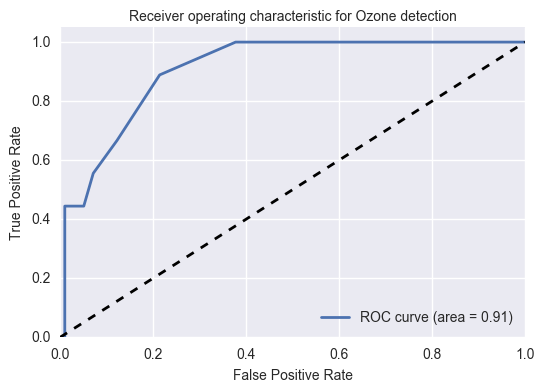

(0.91588785046728971, 0.90759637188208619)

In [455]:
ET = ExtraTreesClassifier()
evaluate_model(ET)

In [456]:
gsET=GridSearchCV(ET, RF_params,n_jobs=-1,cv=KFold(len(y), n_folds=3, shuffle=True))

gsET.fit(X,y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=354, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 4, 7], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'entropy', 'max_depth': None, 'class_weight': None}
0.892655367232
Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               97                1
Above Threshold                6                3

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97        98
        1.0       0.75      0.33      0.46         9

avg / total       0.93      0.93      0.92       107


ROC-AUC curve


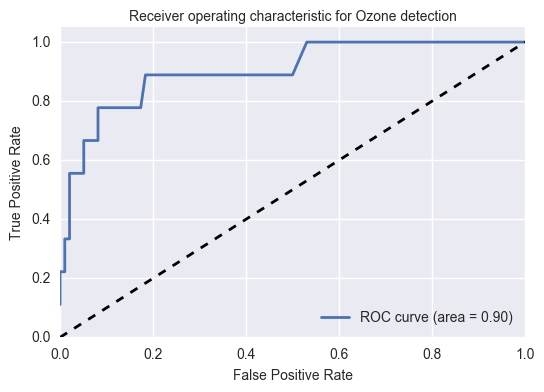

In [457]:
print gsET.best_params_
print gsET.best_score_

ExtraTrees = evaluate_model(gsET.best_estimator_)

MODEL['ExtraTrees']= ExtraTrees[0]
AC_Dict['ExtraTrees']= ExtraTrees[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                8                1

Accuracy Score = 0.92523364486

Classification report
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        98
        1.0       1.00      0.11      0.20         9

avg / total       0.93      0.93      0.90       107


ROC-AUC curve


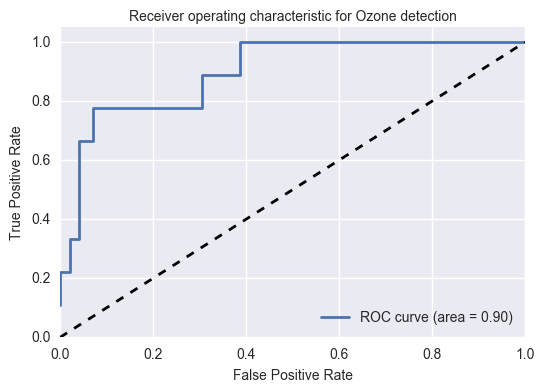

In [459]:
# now bag Extra Trees using the best estimator from the grid search

baggsET = BaggingClassifier(gsET.best_estimator_)

ExtraTrees_Bag = evaluate_model(baggsET)

MODEL['ExtraTrees-BAG']= ExtraTrees_Bag[0]
AC_Dict['ExtraTrees-BAG']= ExtraTrees_Bag[1]

0.934579439252
             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96        98
        1.0       0.67      0.44      0.53         9

avg / total       0.93      0.93      0.93       107

[[96  2]
 [ 5  4]]
[ 0.10360534  0.20686258  0.22851592  0.26959184  0.19142432]


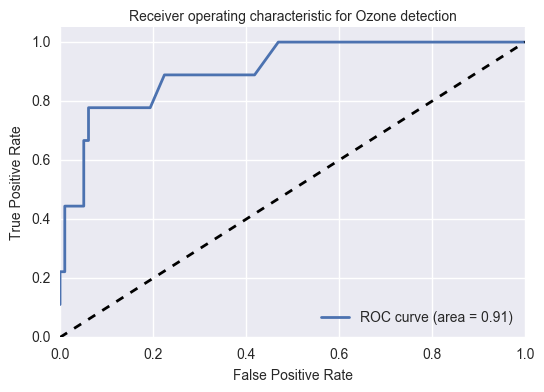

In [301]:
confusion = evaluate_model(gsET.best_estimator_)

In [303]:
confusiontable = pd.DataFrame(confusion, index=['Below Threshold', 'Above Threshold'],
                        columns=['predicted Below','predicted Above'])
confusiontable

,predicted Below,predicted Above
Below Threshold,96,2
Above Threshold,5,4


# Adaboost on DecisionTrees

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                5                4

Accuracy Score = 0.934579439252

Classification report
             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96        98
        1.0       0.67      0.44      0.53         9

avg / total       0.93      0.93      0.93       107


ROC-AUC curve


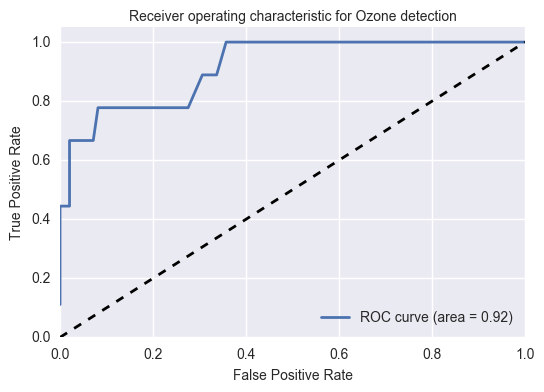

In [463]:
from sklearn.ensemble import AdaBoostClassifier

adaBClassDT = AdaBoostClassifier(RandomForestClassifier(n_estimators=13,max_features='log2',random_state=2),
                          n_estimators=300, random_state=2)

AdaBoostDT = evaluate_model(adaBClassDT)

MODEL['ADABOOST-DTree']= AdaBoostDT[0]
AC_Dict['ADABOOST-DTree']= AdaBoostDT[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               96                2
Above Threshold                8                1

Accuracy Score = 0.906542056075

Classification report
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        98
        1.0       0.33      0.11      0.17         9

avg / total       0.87      0.91      0.88       107


ROC-AUC curve


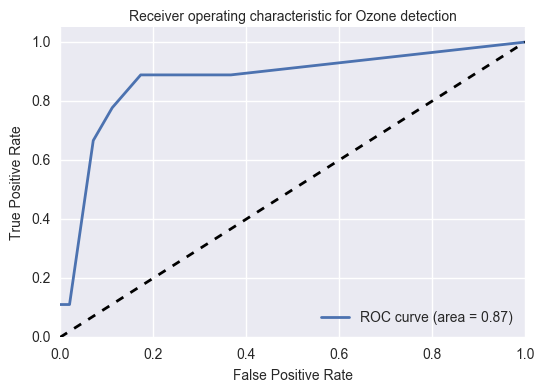

In [464]:
adaBClassET = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=10,max_features='auto',random_state=2),
                          n_estimators=300, random_state=2)

AdaBoostET = evaluate_model(adaBClassET)

MODEL['ADABOOST-ExtraTree']= AdaBoostET[0]
AC_Dict['ADABOOST-ExtraTree']= AdaBoostET[1]

Confusion Matrix
                 predicted Below  predicted Above
Below Threshold               98                0
Above Threshold                6                3

Accuracy Score = 0.943925233645

Classification report
             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97        98
        1.0       1.00      0.33      0.50         9

avg / total       0.95      0.94      0.93       107


ROC-AUC curve


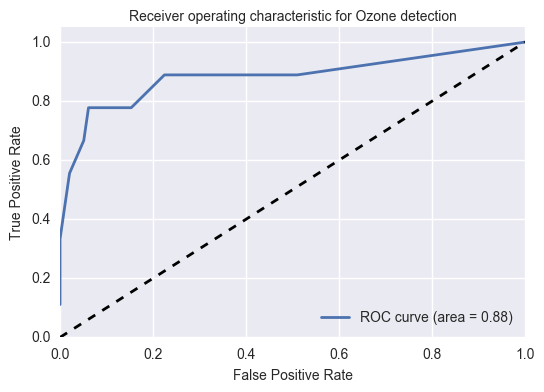

In [413]:
adaBClassET = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=20,max_features='log2',random_state=2),
                          n_estimators=200, random_state=2)

evaluate_model(adaBClassET)

In [484]:
df1 = pd.DataFrame()
df1['MODEL'] = MODEL.keys()
df1['Accuracy Score'] = MODEL.values()
df1.sort("Accuracy Score", inplace = True, ascending=False)

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(0.6, 1.1)

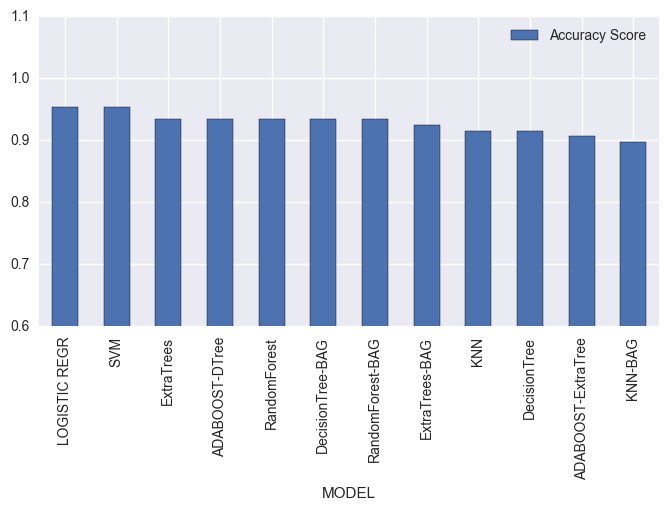

In [485]:
df1.set_index('MODEL', inplace=True)
df1.plot(kind='bar')
plt.ylim(0.6, 1.1)

In [486]:
df1 = pd.DataFrame()
df1['AC_Dict'] = MODEL.keys()
df1['Area Under Curve'] = MODEL.values()
df1.sort("Area Under Curve", inplace = True, ascending=False)

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(0.6, 1.1)

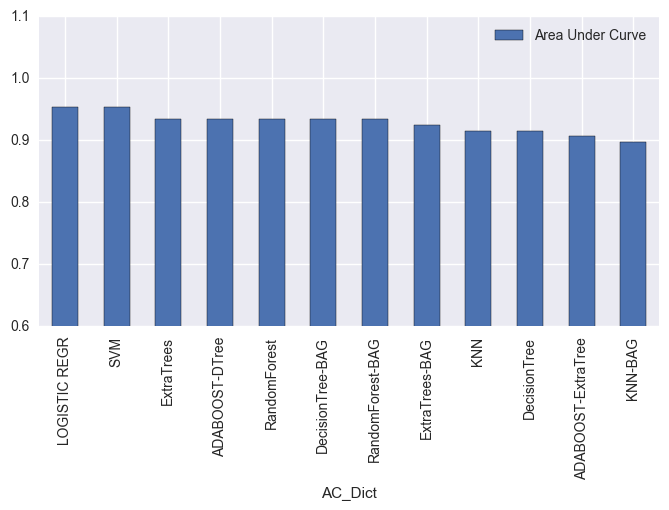

In [487]:
df1.set_index('AC_Dict', inplace=True)
df1.plot(kind='bar')
plt.ylim(0.6, 1.1)

In [253]:

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

#def evaluate_model(model):
#    instance=model
#    instance.fit(X_train,y_train)
#    y_pred= instance.predict(X_test)
    

#print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print metrics.r2_score(y_test, y_pred)

In [367]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# examine the coefficients
# print linreg.coef_

# make predictions
y_pred = linreg.predict(X_test)

# calculate RMSE
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print metrics.r2_score(y_test, y_pred)

0.0113199939784
0.239632279172


In [368]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=.000001, normalize=True)
lassoreg.fit(X_train, y_train)
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print metrics.r2_score(y_test, y_pred)

0.0113090743506
0.241098521626


In [369]:
# use Ridge with alpha =.1

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=.0001, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.239661881758
0.0113197736216


In [370]:
from sklearn import svm, linear_model
from sklearn.cross_validation import cross_val_score


In [371]:
clf = svm.SVR(kernel='rbf',C=.1, epsilon=.01)
print cross_val_score(clf, X, y, cv=3).mean()

-0.0914293080344


In [372]:
clf = svm.SVR(kernel='rbf',C=.1, epsilon=.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

-1.59354427298
0.0209064932658


In [377]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=15)
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.0416615476815
0.0127084860616


In [374]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [375]:
regr_rf = RandomForestRegressor(random_state=2)
regr_rf.fit(X_train, y_train)
y_pred = regr_rf.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.348453861712
0.0104786889136


In [378]:
regr_rf = RandomForestRegressor(n_estimators=13,max_features='log2',random_state=2)
regr_rf.fit(X_train, y_train)
y_pred = regr_rf.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.342800475713
0.0105240518737


In [379]:
from sklearn.ensemble import ExtraTreesRegressor
regr_ET = ExtraTreesRegressor(random_state=2)
regr_ET.fit(X_train, y_train)
y_pred = regr_ET.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.442962274328
0.00968894887679


In [380]:
from sklearn.ensemble import ExtraTreesRegressor
regr_ET = ExtraTreesRegressor(n_estimators=10,max_features='auto',random_state=2)
regr_ET.fit(X_train, y_train)
y_pred = regr_ET.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.442962274328
0.00968894887679


In [381]:
from sklearn.ensemble import BaggingRegressor
betr = BaggingRegressor(ExtraTreesRegressor())
betr.fit(X_train, y_train)
y_pred = betr.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.485751792868
0.0093093798898


In [392]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn import ensemble

GBRparams = {'n_estimators': 3000, 'max_depth': 8, 'min_samples_split': 7,
          'learning_rate': 0.02, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**GBRparams)

GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.285891239422
0.0109702503937


In [383]:
from sklearn.linear_model import BayesianRidge
BayR = BayesianRidge(compute_score=True)
#clf.fit(X, y)

BayR.fit(X_train, y_train)
y_pred = BayR.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.233410707238
0.0113662115353


In [384]:
from sklearn.ensemble import AdaBoostRegressor

regr_ET = ExtraTreesRegressor(n_estimators=10,max_features='auto',random_state=2)

adaBR = AdaBoostRegressor(ExtraTreesRegressor(n_estimators=10,max_features='auto',random_state=0),
                          n_estimators=300, random_state=0)

regr_ET.fit(X_train, y_train)

adaBR.fit(X_train, y_train)

y_pred_ET = regr_ET.predict(X_test)

y_pred_adaBR = adaBR.predict(X_test)

print metrics.r2_score(y_test, y_pred_ET)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred_ET))
print ' '
print metrics.r2_score(y_test, y_pred_adaBR)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaBR))

0.442962274328
0.00968894887679
 
0.424703573301
0.00984646174972


531

In [385]:
regr_rf = RandomForestRegressor(n_estimators=13,max_features='log2',random_state=2)

adaBR = AdaBoostRegressor(RandomForestRegressor(n_estimators=13,max_features='log2',random_state=2),
                          n_estimators=300, random_state=2)

regr_rf.fit(X_train, y_train)
adaBR.fit(X_train, y_train)

regr_rf = regr_ET.predict(X_test)

y_pred_adaBR = adaBR.predict(X_test)

print metrics.r2_score(y_test, regr_rf)
print np.sqrt(metrics.mean_squared_error(y_test, regr_rf))
print ' '
print metrics.r2_score(y_test, y_pred_adaBR)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred_adaBR))

0.442962274328
0.00968894887679
 
0.434490886946
0.00976234527697


In [393]:
params = {
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=5)

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/user/anaconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/user/anaconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1004cf230, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/user/...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1004cf230, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/user/...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    648 
    649         If a global instance already exists, this reinitializes and starts it
    650         """
    651         app = cls.instance(**kwargs)
    652         app.initialize(argv)
--> 653         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    654 
    655 #-----------------------------------------------------------------------------
    656 # utility functions, for convenience
    657 #-----------------------------------------------------------------------------

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n          'criterion': ['gini', 'entr...y)\nprint gsrf.best_params_\nprint gsrf.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-02-06T22:44:21.684515', 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'session': 'D5D4DB67EBDC4D178F7CEECAE75253A8', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['D5D4DB67EBDC4D178F7CEECAE75253A8']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n          'criterion': ['gini', 'entr...y)\nprint gsrf.best_params_\nprint gsrf.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-02-06T22:44:21.684515', 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'session': 'D5D4DB67EBDC4D178F7CEECAE75253A8', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['D5D4DB67EBDC4D178F7CEECAE75253A8'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n          'criterion': ['gini', 'entr...y)\nprint gsrf.best_params_\nprint gsrf.best_score_", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-02-06T22:44:21.684515', 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'session': 'D5D4DB67EBDC4D178F7CEECAE75253A8', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '76DDC55278874E798078A93A214B1BA8', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"params = {\n          'criterion': ['gini', 'e...nprint gsrf.best_params_\nprint gsrf.best_score_", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"params = {\n          'criterion': ['gini', 'e...nprint gsrf.best_params_\nprint gsrf.best_score_"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"params = {\n          'criterion': ['gini', 'e...nprint gsrf.best_params_\nprint gsrf.best_score_",), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"params = {\n          'criterion': ['gini', 'e...nprint gsrf.best_params_\nprint gsrf.best_score_",)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"params = {\n          'criterion': ['gini', 'e...nprint gsrf.best_params_\nprint gsrf.best_score_", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Print object>, <_ast.Print object>], cell_name='<ipython-input-393-f88099b3f681>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 120071fd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x11f8dc130, file "<ipython-input-393-f88099b3f681>", line 12>
        result = <ExecutionResult object at 120071fd0, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x11f8dc130, file "<ipython-input-393-f88099b3f681>", line 12>, result=<ExecutionResult object at 120071fd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x11f8dc130, file "<ipython-input-393-f88099b3f681>", line 12>
        self.user_global_ns = {'AdaBoostRegressor': <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>, 'BaggingRegressor': <class 'sklearn.ensemble.bagging.BaggingRegressor'>, 'BayR': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, comp...       normalize=False, tol=0.001, verbose=False), 'BayesianRidge': <class 'sklearn.linear_model.bayes.BayesianRidge'>, 'Channelview_nox':         date_local  nox_max
125891  2015-01-01  ...6251  2015-12-31      5.4

[361 rows x 2 columns], 'Channelview_oz':         State Code  County Code  Site Num  Param...X           2016-07-31  

[369 rows x 29 columns], 'Channelview_oz_max':      date_local  oz_max
0    2015-01-01   0.015
...3
365  2015-12-31   0.023

[365 rows x 2 columns], 'Channelview_sun':        date_local  sun_max
59490  2015-01-01    ...9854  2015-12-31     0.36

[365 rows x 2 columns], 'Channelview_temp':         date_local  temp_max
205363  2015-01-01 ...727  2015-12-31      54.0

[365 rows x 2 columns], 'Channelview_voc':         date_local  voc_max                     ... 1,2,3-Trimethylbenzene

[16946 rows x 3 columns], ...}
        self.user_ns = {'AdaBoostRegressor': <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>, 'BaggingRegressor': <class 'sklearn.ensemble.bagging.BaggingRegressor'>, 'BayR': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, comp...       normalize=False, tol=0.001, verbose=False), 'BayesianRidge': <class 'sklearn.linear_model.bayes.BayesianRidge'>, 'Channelview_nox':         date_local  nox_max
125891  2015-01-01  ...6251  2015-12-31      5.4

[361 rows x 2 columns], 'Channelview_oz':         State Code  County Code  Site Num  Param...X           2016-07-31  

[369 rows x 29 columns], 'Channelview_oz_max':      date_local  oz_max
0    2015-01-01   0.015
...3
365  2015-12-31   0.023

[365 rows x 2 columns], 'Channelview_sun':        date_local  sun_max
59490  2015-01-01    ...9854  2015-12-31     0.36

[365 rows x 2 columns], 'Channelview_temp':         date_local  temp_max
205363  2015-01-01 ...727  2015-12-31      54.0

[365 rows x 2 columns], 'Channelview_voc':         date_local  voc_max                     ... 1,2,3-Trimethylbenzene

[16946 rows x 3 columns], ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/user/Desktop/DC-DSI-3/projects/Capstone/<ipython-input-393-f88099b3f681> in <module>()
      7 
      8 gsrf = GridSearchCV(RandomForestRegressor(n_jobs=-1),
      9                     params, n_jobs=-1,
     10                     cv=5)
     11 
---> 12 gsrf.fit(X, y)
     13 print gsrf.best_params_
     14 print gsrf.best_score_
     15 
     16 

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), X=     voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns], y=0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64)
    799         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    800             Target relative to X for classification or regression;
    801             None for unsupervised learning.
    802 
    803         """
--> 804         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X =      voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns]
        y = 0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64
        self.param_grid = {'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, 5], 'min_samples_split': [2, 5]}
    805 
    806 
    807 class RandomizedSearchCV(BaseSearchCV):
    808     """Randomized search on hyper parameters.

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=0), X=     voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns], y=0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    548         )(
    549             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    550                                     train, test, self.verbose, parameters,
    551                                     self.fit_params, return_parameters=True,
    552                                     error_score=self.error_score)
--> 553                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    554                 for train, test in cv)
    555 
    556         # Out is a list of triplet: score, estimator, n_test_samples
    557         n_fits = len(out)

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    805             if pre_dispatch == "all" or n_jobs == 1:
    806                 # The iterable was consumed all at once by the above for loop.
    807                 # No need to wait for async callbacks to trigger to
    808                 # consumption.
    809                 self._iterating = False
--> 810             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    811             # Make sure that we get a last message telling us we are done
    812             elapsed_time = time.time() - self._start_time
    813             self._print('Done %3i out of %3i | elapsed: %s finished',
    814                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Feb  6 22:44:21 2017
PID: 6397                   Python 2.7.12: /Users/user/anaconda2/bin/python
...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False),      voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns], 0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64, <function _passthrough_scorer>, array([ 71,  72,  73,  74,  75,  76,  77,  78,  ...44, 345, 346, 347, 348, 349, 350, 351, 352, 353]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70]), 0, {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False),      voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns], 0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64, <function _passthrough_scorer>, array([ 71,  72,  73,  74,  75,  76,  77,  78,  ...44, 345, 346, 347, 348, 349, 350, 351, 352, 353]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70]), 0, {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}, {}), {'error_score': 'raise', 'return_parameters': True})]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), X=     voc_max  nox_max  temp_max  sun_max  wind_m...  54.0     0.36       9.6

[354 rows x 5 columns], y=0      0.015
1      0.011
2      0.005
3      0....  0.013
353    0.023
Name: oz_max, dtype: float64, scorer=<function _passthrough_scorer>, train=array([ 71,  72,  73,  74,  75,  76,  77,  78,  ...44, 345, 346, 347, 348, 349, 350, 351, 352, 353]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70]), verbose=0, parameters={'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1515     fit_params = fit_params if fit_params is not None else {}
   1516     fit_params = dict([(k, _index_param_value(X, v, train))
   1517                       for k, v in fit_params.items()])
   1518 
   1519     if parameters is not None:
-> 1520         estimator.set_params(**parameters)
        estimator.set_params = <bound method RandomForestRegressor.set_params o...te=None,
           verbose=0, warm_start=False)>
        parameters = {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
   1521 
   1522     start_time = time.time()
   1523 
   1524     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/Users/user/anaconda2/lib/python2.7/site-packages/sklearn/base.py in set_params(self=RandomForestRegressor(bootstrap=True, criterion=...ate=None,
           verbose=0, warm_start=False), **params={'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2})
    265                 # simple objects case
    266                 if key not in valid_params:
    267                     raise ValueError('Invalid parameter %s for estimator %s. '
    268                                      'Check the list of available parameters '
    269                                      'with `estimator.get_params().keys()`.' %
--> 270                                      (key, self.__class__.__name__))
        key = 'class_weight'
        self.__class__.__name__ = 'RandomForestRegressor'
    271                 setattr(self, key, value)
    272         return self
    273 
    274     def __repr__(self):

ValueError: Invalid parameter class_weight for estimator RandomForestRegressor. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

#  Change the target to a classification instead of continuous.

In [386]:
x_y.head()

,date_local,nox_max,voc_max,temp_max,sun_max,wind_max,oz_max
0,2015-01-01,5.8,140.42,46.0,0.15,8.4,0.015
1,2015-01-02,10.4,320.06,56.0,0.32,6.4,0.011
2,2015-01-03,10.9,285.63,55.0,0.21,7.9,0.005
3,2015-01-04,16.2,275.19,53.0,0.76,9.1,0.026
4,2015-01-05,27.5,720.87,50.0,0.76,10.1,0.022


In [387]:
x_y.shape

(354, 7)

<function matplotlib.pyplot.show>

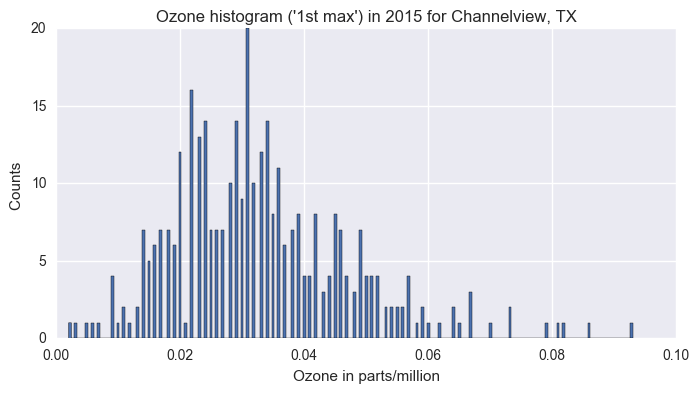

In [210]:
plt.hist(x_y['oz_max'], bins = 200)
plt.xlabel("Ozone in parts/million")
plt.title("Ozone histogram ('1st max') in 2015 for Channelview, TX")
plt.savefig('Channelview TX Ozone .jpg')
plt.ylabel("Counts ")
plt.show

In [163]:
#Channelview_temp = temp[temp['City Name'] == 'Channelview'][['Date Local','1st Max Value']]
class_list=[]
for i in x_y['oz_max']:
    if i >= 0.05:
        class_list.append(1.0)
    else: 
        class_list.append(0.0)

len(class_list)

y = pd.Series(class_list)
x_y['target']= y
x_y.head()

,date_local,nox_max,voc_max,temp_max,sun_max,wind_max,oz_max,target
0,2015-01-01,5.8,140.42,46.0,0.15,8.4,0.015,0.0
1,2015-01-02,10.4,320.06,56.0,0.32,6.4,0.011,0.0
2,2015-01-03,10.9,285.63,55.0,0.21,7.9,0.005,0.0
3,2015-01-04,16.2,275.19,53.0,0.76,9.1,0.026,0.0
4,2015-01-05,27.5,720.87,50.0,0.76,10.1,0.022,0.0


In [396]:

t= x_y[x_y['oz_max'] >= 0.06]
t.shape

(16, 7)

In [164]:
x_y['target'].value_counts().unique()

array([311,  43])

In [ ]:
y